In [14]:
# -*- coding: utf-8 -*-
import math
import pandas as pd
import sklearn
import numpy as np
from pyearth import Earth
import matplotlib.pyplot as pyplot 
import seaborn as sns
from scipy.stats import skew, skewtest

train = pd.read_csv("/home/saikat/Documents/2020/Project/Dataset_ML_Cla.csv")
test = pd.read_csv("/home/saikat/Documents/2020/Project/Dataset_ML_Cla.csv")
train = train[0:2610]
test = train
train.describe()


,year,month,day,day_week,close_norm,open_norm,high_norm,low_norm,range_norm
count,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000
mean,2013.491571,6.528736,15.736398,3.999234,0.555939,0.000779,0.000749,0.000780,0.154307
std,2.876286,3.450040,8.803216,1.413942,0.496956,0.016098,0.014239,0.015184,0.718611
min,2008.000000,1.000000,1.000000,2.000000,0.000000,-0.096846,-0.080913,-0.123607,-2.114471
25%,2011.000000,4.000000,8.000000,3.000000,0.000000,-0.007242,-0.005541,-0.006241,-0.303697
50%,2013.000000,7.000000,16.000000,4.000000,1.000000,0.000000,0.000149,0.000000,0.000000
75%,2016.000000,10.000000,23.000000,5.000000,1.000000,0.008686,0.006842,0.007603,0.396617
max,2018.000000,12.000000,31.000000,6.000000,1.000000,0.142209,0.192929,0.142209,7.958861


In [15]:
train.isnull().values.any()

False

In [16]:
y_train = train['close_norm']
print(y_train)

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
2605    0.0
2606    1.0
2607    1.0
2608    0.0
2609    1.0
Name: close_norm, Length: 2610, dtype: float64


In [17]:
X_train = train.drop(['close_norm'], axis=1)
print(X_train)

        year  month   day  day_week  open_norm  high_norm  low_norm  \
0     2008.0   12.0  29.0       2.0  -0.038202  -0.014263 -0.017903   
1     2008.0   12.0  30.0       3.0   0.044757   0.028949  0.052009   
2     2008.0   12.0  31.0       4.0   0.021239   0.001252  0.010713   
3     2009.0    1.0   1.0       5.0  -0.014752   0.003086  0.007619   
4     2009.0    1.0   2.0       6.0   0.026897   0.024050  0.016815   
...      ...    ...   ...       ...        ...        ...       ...   
2605  2018.0   12.0  24.0       2.0  -0.014093  -0.015866 -0.005449   
2606  2018.0   12.0  25.0       3.0   0.000000   0.000000  0.000000   
2607  2018.0   12.0  26.0       4.0  -0.009043   0.003501 -0.010076   
2608  2018.0   12.0  27.0       5.0   0.021275   0.007799  0.016546   
2609  2018.0   12.0  28.0       6.0  -0.005597  -0.000973  0.007245   

      range_norm  
0       0.049852  
1      -0.351038  
2      -0.251491  
3      -0.160391  
4       0.337214  
...          ...  
2605   -0.5276

In [18]:
y_test = test['close_norm']
print(y_test)

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
2605    0.0
2606    1.0
2607    1.0
2608    0.0
2609    1.0
Name: close_norm, Length: 2610, dtype: float64


In [19]:
X_test = test.drop(['close_norm'], axis=1)
print(X_test)

        year  month   day  day_week  open_norm  high_norm  low_norm  \
0     2008.0   12.0  29.0       2.0  -0.038202  -0.014263 -0.017903   
1     2008.0   12.0  30.0       3.0   0.044757   0.028949  0.052009   
2     2008.0   12.0  31.0       4.0   0.021239   0.001252  0.010713   
3     2009.0    1.0   1.0       5.0  -0.014752   0.003086  0.007619   
4     2009.0    1.0   2.0       6.0   0.026897   0.024050  0.016815   
...      ...    ...   ...       ...        ...        ...       ...   
2605  2018.0   12.0  24.0       2.0  -0.014093  -0.015866 -0.005449   
2606  2018.0   12.0  25.0       3.0   0.000000   0.000000  0.000000   
2607  2018.0   12.0  26.0       4.0  -0.009043   0.003501 -0.010076   
2608  2018.0   12.0  27.0       5.0   0.021275   0.007799  0.016546   
2609  2018.0   12.0  28.0       6.0  -0.005597  -0.000973  0.007245   

      range_norm  
0       0.049852  
1      -0.351038  
2      -0.251491  
3      -0.160391  
4       0.337214  
...          ...  
2605   -0.5276

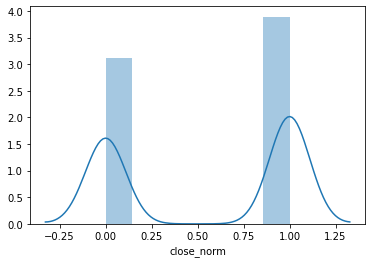

In [20]:
ax = sns.distplot(y_train)
pyplot.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [22]:
model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [24]:
model.score(X_train, y_train)

0.8042145593869732

In [25]:
y_pred = model.predict(X_test)
print(model)
#print(model.summary())
print(y_pred)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')
[0. 1. 0. ... 0. 1. 1.]


In [26]:
print("Confusion Matrix: ", 
confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", 
accuracy_score(y_test,y_pred)*100) 
      
print("Report : ", 
classification_report(y_test, y_pred))

Confusion Matrix:  [[ 993  166]
 [ 345 1106]]
Accuracy :  80.42145593869732
Report :                precision    recall  f1-score   support

         0.0       0.74      0.86      0.80      1159
         1.0       0.87      0.76      0.81      1451

    accuracy                           0.80      2610
   macro avg       0.81      0.81      0.80      2610
weighted avg       0.81      0.80      0.80      2610



In [27]:
#pyplot.title("Actual Vs Predicted")
#pyplot.plot(y_test , label='Actual')
#pyplot.plot(y_pred , linestyle='dashed' , label='Predicted')
#pyplot.legend()
#pyplot.xlabel('Observation')
#pyplot.ylabel('Close Prices')
#pyplot.show()

In [28]:
#pyplot.scatter(y_test, y_pred)
#pyplot.show()

In [29]:
#plot_lm_1 = pyplot.figure()
#plot_lm_1.axes[0] = sns.residplot(y_pred, test.columns[-5], data=test,
                          #lowess=True,
                          #scatter_kws={'alpha': 0.5},
                          #line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

#plot_lm_1.axes[0].set_title('Residuals vs Fitted')
#plot_lm_1.axes[0].set_xlabel('Fitted values')
#plot_lm_1.axes[0].set_ylabel('Residuals');